In [1]:
import numpy as np
import laspy as lp
from tool import DataProcessing as DP
from helper_ply import write_ply, read_ply
from tqdm import tqdm


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
from labels import id2label

In [4]:
id2label
for i in range(len(id2label)-1):
    print(id2label[i].name, ': ', id2label[i].trainId)

unlabeled :  -1
ego vehicle :  -1
rectification border :  -1
out of roi :  -1
static :  -1
dynamic :  -1
ground :  -1
road :  0
sidewalk :  1
parking :  -1
rail track :  -1
building :  2
wall :  3
fence :  4
guard rail :  -1
bridge :  -1
tunnel :  -1
pole :  5
polegroup :  -1
traffic light :  6
traffic sign :  7
vegetation :  8
terrain :  9
sky :  -1
person :  10
rider :  -1
car :  11
truck :  12
bus :  -1
caravan :  -1
trailer :  -1
train :  -1
motorcycle :  13
bicycle :  14
garage :  2
gate :  4
stop :  -1
smallpole :  5
lamp :  -1
trash bin :  -1
vending machine :  -1
box :  -1
unknown construction :  -1
unknown vehicle :  -1
unknown object :  -1


In [5]:
# path = '/home/mspl/kitti_semantics/test/Log_2022-09-20_07-10-03/test_preds2/validationTT1.ply'

# data = read_ply(path)
# # np.savetxt('./data.txt', data, fmt='%d')
# print(data.dtype)
# print(np.asarray(data))

In [5]:
# path = 'data_3d_semantics/train/2013_05_28_drive_0000_sync/static/0000000002_0000000385.ply'
path = '/home/mspl/kitti_semantics/test/Log_2022-09-20_07-10-03/test_preds2/validationTT1.ply'

xyz, rgb, labels = DP.read_ply_data(path, with_rgb=True, with_label=True)

In [6]:
print(labels)

[1 1 0 ... 8 8 8]


In [7]:
#  traffic signs (1) and traffic lights (2)
# for i in tqdm(range(len(labels))):
#     if labels[i] == 6:
#         labels[i] = 2
#     elif labels[i] == 7:
#         labels[i] = 1
#     else:
#         labels[i] = 0

In [35]:
# point_cloud_las=lp.read('/home/mspl/Downloads/validation.las')

In [7]:
# label_gt = np.asarray(point_cloud_las.classification)
# print(label_gt)
_, _, labels_gt = DP.read_ply_data('/home/mspl/kitti_semantics/Dataset/kitti/train/validationTT1.ply', with_rgb=True, with_label=True)
print(len(labels_gt))

4270169


In [8]:
labels_gt

array([ 1,  1, 11, ...,  8,  8,  8], dtype=uint8)

In [9]:
print(labels)

[1 1 0 ... 8 8 8]


In [10]:
from sklearn.metrics import confusion_matrix

In [27]:

correct = np.sum(labels == labels_gt)

conf_matrix = confusion_matrix(labels_gt, labels, labels=np.arange(0, 15, 1))
gt_classes = np.sum(conf_matrix, axis=1)
positive_classes = np.sum(conf_matrix, axis=0)
true_positive_classes = np.diagonal(conf_matrix)

In [17]:
iou_list = []
for n in range(0, 11, 1):
    iou = true_positive_classes[n] / float(gt_classes[n] + positive_classes[n] - true_positive_classes[n] + 0.1)
    iou_list.append(iou)
mean_iou = sum(iou_list) / float(12)

In [18]:
print(iou_list)
print(mean_iou)
print(conf_matrix)
print(correct/len(labels_gt))

[0.9253953803762398, 0.4996360550315799, 0.016208590230904003, 0.15704780339281638, 0.13500358695365006, 0.502893403961169, 0.0, 0.057138984544095286, 0.7123965067078035, 0.6621737698524162, 0.6781092247920266]
0.36216694215355844
[[2880085  121698       0       0     142     457       0       0       0
    77183    8204       0]
 [  10913  199816     326     605    7215    4896       0       0     806
    35202    3402     588]
 [      0       0    2014       0       0     223       0      59     703
        0       0       0]
 [      0    1872   80717   18507       0       0       0       0       0
        0       0       0]
 [      0    1660      35   14969    6643       0       0       0   11668
        0       0       0]
 [    289      73   11401       1    1364   63257       0     356   12353
     4047       0      92]
 [      0       0   28408       0       0    3681       0     603   30629
      646       0       0]
 [      0       0     369       0       0    9812       0    1

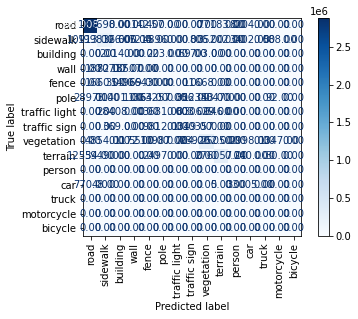

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=['road','sidewalk','building','wall','fence','pole','traffic light','traffic sign','vegetation','terrain',
                                'person',
                                'car',
                                'truck',
                                'motorcycle',
                                'bicycle'
                                ])
cmd.plot(cmap = 'Blues', values_format = '.2f', xticks_rotation = 'vertical')



                        predicted
                     0       1       2  
                  -----    -----   -----
               0| 4194491|  2977 |   0
      (actual)    -----    -----   -----
               1| 13619  |  351  |   0
                  -----    -----   -----
               2| 58731  |   0   |   0  

### Downsampled factor 3

In [18]:
path = '/home/mspl/kitti_semantics/test/Log_2022-09-20_07-10-03/test_preds2/validationTT2.ply'

xyz, rgb, labels = DP.read_ply_data(path, with_rgb=True, with_label=True)
# for i in tqdm(range(len(labels))):
#     if labels[i] == 6:
#         labels[i] = 2
#     elif labels[i] == 7:
#         labels[i] = 1
#     else:
#         labels[i] = 0


In [19]:
_, _, labels_gt = DP.read_ply_data('/home/mspl/kitti_semantics/Dataset/kitti/train/validationTT2.ply', with_rgb=True, with_label=True)
print(len(labels_gt))

1423389


In [20]:
from sklearn.metrics import confusion_matrix

correct = np.sum(labels == labels_gt)

conf_matrix = confusion_matrix(labels_gt, labels, np.arange(0, 15, 1))
gt_classes = np.sum(conf_matrix, axis=1)
positive_classes = np.sum(conf_matrix, axis=0)
true_positive_classes = np.diagonal(conf_matrix)

iou_list = []
for n in range(0, 15, 1):
    iou = true_positive_classes[n] / float(gt_classes[n] + positive_classes[n] - true_positive_classes[n] + 0.1)
    iou_list.append(iou)
mean_iou = sum(iou_list) / float(15)

print(iou_list)
print(mean_iou)
print(conf_matrix)
print(correct/len(label_gt))

[0.9049314178478088, 0.4394661927224068, 0.016258040352853387, 0.4586575472479794, 0.2552810012024105, 0.550168496291513, 0.0, 0.17541825602022004, 0.7520812135109536, 0.6090756594278511, 0.0, 0.5328720773210737, 0.0, 0.0, 0.0]
0.31294732679633797
[[942383  44554      0      0      8      0      0      0     10  41137
       0   1069      0      0      0]
 [  9549  59542      2    320   1263    443      0      0   1080  15057
       0    707      0      0      0]
 [     0      0    573      0      0    118      0     24    269      0
       0      0      0      0      0]
 [     0    510  14807  18267     16      0      0      0      0      0
       0      0      0      0      0]
 [     0    346    100   5607   3588      0      0      0   2004     26
       0      0      0      0      0]
 [   123    384    650      0    256  21044      0    147   6771   1613
       0     13      0     52      0]
 [    68      0  17165      0      0   1351      0   1156   1409    149
       0      0     

                        predicted
                     0       1       2  
                  -----    -----   -----
               0| 1395986|  2994  |  4
      (actual)    -----    -----   -----
               1| 3539   |  1186  |  0
                  -----    -----   -----
               2| 18500  |  1180  |  0  

### Downsampled factor 4

In [21]:
path = '/home/mspl/kitti_semantics/test/Log_2022-09-20_07-10-03/test_preds2/validationTT3.ply'

xyz, rgb, labels = DP.read_ply_data(path, with_rgb=True, with_label=True)
# for i in tqdm(range(len(labels))):
#     if labels[i] == 6:
#         labels[i] = 2
#     elif labels[i] == 7:
#         labels[i] = 1
#     else:
#         labels[i] = 0


In [22]:
_, _, labels_gt = DP.read_ply_data('/home/mspl/kitti_semantics/Dataset/kitti/train/validationTT3.ply', with_rgb=True, with_label=True)
print(len(labels_gt))

1067542


In [24]:
from sklearn.metrics import confusion_matrix

correct = np.sum(labels == labels_gt)

conf_matrix = confusion_matrix(labels_gt, labels, np.arange(0, 15, 1))
gt_classes = np.sum(conf_matrix, axis=1)
positive_classes = np.sum(conf_matrix, axis=0)
true_positive_classes = np.diagonal(conf_matrix)

iou_list = []
for n in range(0, 15, 1):
    iou = true_positive_classes[n] / float(gt_classes[n] + positive_classes[n] - true_positive_classes[n] + 0.1)
    iou_list.append(iou)
mean_iou = sum(iou_list) / float(15)

print(iou_list)
print(mean_iou)
print(conf_matrix)
print(correct/len(label_gt))

[0.9292319331196596, 0.5322564424754072, 0.01807258340253016, 0.424832956492644, 0.3986947677120228, 0.6225891239934241, 0.0, 0.07263450382671714, 0.631091909259644, 0.6466230323160621, 0.0, 0.4647369856812022, 0.0, 0.0, 0.0]
0.31605094921862087
[[724197  23277      0      0      0     99      0      0      0  23771
       0   1094      0      0      0]
 [  4212  49221    122    241    378    559      0      0    157   9552
       0   1503      0    117      0]
 [     0      0    259      0      0    178      0     84    179      1
       0      0      0      0      0]
 [     0    196  12572  12570      0      0      0      0      0      0
       0      0      0      0      0]
 [     0    423     29   3863   3861      0      0      0    526     19
       0      0      0      0      0]
 [    69    485    209      0     18  19352      0     36   2124    673
       0    161      0      0      0]
 [     0      0    472      0      0    917      0    433  14032    148
       0      0      0

                        predicted
                     0       1       2  
                  -----    -----   -----
               0| 1047106| 2172  |   0
      (actual)    -----    -----   -----
               1| 3439   |  43   |   0
                  -----    -----   -----
               2| 14573  |  209  |   0  

In [16]:
for i in range(len(labels)):
    labels[i] = id2label[labels[i]].trainId

KeyError: 255

In [18]:
labels

array([9, 9, 9, ..., 8, 8, 8], dtype=uint8)

In [19]:
# labels.tofile('labels.txt')
np.savetxt('./data.txt', labels, delimiter=',', fmt='%d')

In [10]:
min(labels.tolist())

6

In [4]:
import pandas as pd
import os
from os import listdir
from os.path import isfile, join, split

In [20]:
train_files = list(pd.read_csv('data_3d_semantics/train/2013_05_28_drive_train.txt', delimiter = "\t", header=None)[0])
val_files = list(pd.read_csv('data_3d_semantics/train/2013_05_28_drive_val.txt', delimiter = "\t", header=None)[0])

In [21]:
testpath1 = 'data_3d_semantics/test/2013_05_28_drive_0008_sync/static/'
testpath2 = 'data_3d_semantics/test/2013_05_28_drive_0018_sync/static/'
test_files = [join(testpath1, f) for f in listdir(testpath1) if isfile(join(testpath1, f))] + [join(testpath2, f) for f in listdir(testpath2) if isfile(join(testpath2, f))]

print(len(test_files))

42


In [ ]:
# train files
output_path = 'data_3d_semantics/train/converted_train3/'
# print(output_paths)
for i in tqdm(range(len(train_files))):
    _, filename = split(train_files[i])
    # point_cloud=lp.read(train_files[i])
    xyz, rgb, labels = DP.read_ply_data(train_files[i], with_rgb=True, with_label=True)
    for i in range(len(labels)):
        labels[i] = id2label[labels[i]].trainId
        if labels[i]==-1 or labels[i]==255:
            labels[i] = 15
    field_names = ['x', 'y', 'z', 'red', 'green', 'blue', 'semantic']
    write_ply(join(output_path, filename), [xyz, rgb, labels], field_names)
    # write_ply(output_paths[i], points, ['x', 'y', 'z'])

In [ ]:
# val files
output_path = 'data_3d_semantics/train/converted_val3/'
# print(output_paths)
for i in tqdm(range(len(val_files))):
    _, filename = split(val_files[i])
    xyz, rgb, labels = DP.read_ply_data(val_files[i], with_rgb=True, with_label=True)
    for i in range(len(labels)):
        labels[i] = id2label[labels[i]].trainId
        if labels[i]==-1 or labels[i]==255:
            labels[i] = 15
    field_names = ['x', 'y', 'z', 'red', 'green', 'blue', 'semantic']
    write_ply(join(output_path, filename), [xyz, rgb, labels], field_names)

In [ ]:
# test files
output_path = 'data_3d_semantics/test/converted_test3/'
# print(output_paths)
for i in tqdm(range(len(test_files))):
    _, filename = split(test_files[i])
    xyz, rgb = DP.read_ply_data(test_files[i], with_rgb=True, with_label=False)
    field_names = ['x', 'y', 'z', 'red', 'green', 'blue']
    write_ply(join(output_path, filename), [xyz, rgb], field_names)

In [10]:
xyz

array([[1000.8657, 3820.2976,  116.2225],
       [1000.8753, 3820.3816,  116.193 ],
       [1000.9065, 3820.6013,  116.188 ],
       ...,
       [1001.1812, 3820.5242,  117.0209],
       [1001.1264, 3820.5708,  117.1629],
       [1001.1545, 3820.547 ,  117.3406]], dtype=float32)

In [4]:
length = xyz.shape[0]
sum_x = np.sum(xyz[:, 0])
sum_y = np.sum(xyz[:, 1])
sum_z = np.sum(xyz[:, 2])
x = sum_x/length
y = sum_y/length
z = sum_z/length
print(x)
print(y)
print(z)

923.1289062817252
3741.386696354439
115.50409675015104


In [26]:
path2= './output/output_1.ply'
xyz2, rgb2 = DP.read_ply_data(path2, with_rgb=True, with_label=False)

In [27]:
length = xyz2.shape[0]
sum_x2 = np.sum(xyz2[:, 0])
sum_y2 = np.sum(xyz2[:, 1])
sum_z2 = np.sum(xyz2[:, 2])
x2 = sum_x2/length
y2 = sum_y2/length
z2 = sum_z2/length
print(x2)
print(y2)
print(z2)

272023.23462732113
2768801.6810691734
85.93140776051813


In [28]:
path3= './output/output_2.ply'
xyz3, rgb3 = DP.read_ply_data(path3, with_rgb=True, with_label=False)
length3 = xyz3.shape[0]
sum_x3 = np.sum(xyz3[:, 0])
sum_y3 = np.sum(xyz3[:, 1])
sum_z3 = np.sum(xyz3[:, 2])
x3 = sum_x3/length3
y3 = sum_y3/length3
z3 = sum_z3/length3
print(x3)
print(y3)
print(z3)

272448.97268604464
2768556.926875687
87.34436235290374


In [30]:
path4= './output/output_3.ply'
xyz4, rgb4 = DP.read_ply_data(path4, with_rgb=True, with_label=False)
length4 = xyz4.shape[0]
sum_x4 = np.sum(xyz4[:, 0])
sum_y4 = np.sum(xyz4[:, 1])
sum_z4 = np.sum(xyz4[:, 2])
x4 = sum_x4/length4
y4 = sum_y4/length4
z4 = sum_z4/length4
print(x4)
print(y4)
print(z4)

272266.28807301976
2768611.057881151
85.152511099244


In [31]:
X = (x2 + x3 + x4)/3
Y = (y2 + y3 + y4)/3
Z = (z2 + z3 + z4)/3
print(X,Y,Z)

272246.1651287952 2768656.5552753373 86.14276040422196


In [32]:
tx = X - x
ty = Y - y
tz = Z - z 
print(tx, ty, tz)

271201.9259522997 2766607.620358451 46.498865480348066


In [2]:
input_paths = [ './input/output_1.las',
                './input/output_2.las',
                './input/output_3.las']

In [3]:
output_paths = ['./output/output_1.ply',
                './output/output_2.ply',
                './output/output_3.ply']

In [8]:
a = np.ones((3,3),dtype=np.uint)
b = np.ones((1,3),dtype=np.uint)
print(a)
print(b)
for i in range(3):
    a[i,:] = a[i,:] + b
print(a)

[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[1 1 1]]
[[2 2 2]
 [2 2 2]
 [2 2 2]]


In [ ]:
for i in tqdm(range(len(input_paths))):
    point_cloud=lp.read(input_paths[i])
    points = np.vstack((point_cloud.x, point_cloud.y, point_cloud.z)).transpose()
    print(len(points))
    values = np.random.randint(13, size=len(points), dtype=np.uint8)
    print(values.shape)
    colors = np.ones((len(points),3), dtype=np.uint8) * 255 #np.random.randint(255, size=(10,3), dtype=np.uint8)
    print(colors.shape)
    # factor=3
    # decimated_points_random = points[::factor]
    points = np.asarray(points)
    points.astype(np.float32)
    field_names = ['x', 'y', 'z', 'red', 'green', 'blue', 'values']
    write_ply(output_paths[i], [points, colors, values], field_names)
    # write_ply(output_paths[i], points, ['x', 'y', 'z'])

    

In [2]:
file_name = 'output_3.las'
input_path = '/media/mspl/D826716926714A10/Chuong/Thinktron/Collaborate_with_NTUST/Collaborate_with_NTUST/PointCloudExample/output/'+ file_name
point_cloud=lp.read(input_path)


In [3]:
file_name = 'validation.las'
input_path = '/home/mspl/Downloads/'+ file_name
point_cloud=lp.read(input_path)

In [16]:
labels = np.asarray(point_cloud.classification)

In [9]:
print(np.asarray(labels))
np.savetxt('./labelstest.txt', labels, delimiter=',', fmt='%d')

[0 0 0 ... 0 0 0]


In [10]:
points = np.vstack((point_cloud.x, point_cloud.y, point_cloud.z)).transpose()
# colors = np.vstack((point_cloud.red, point_cloud.green, point_cloud.blue)).transpose()

In [12]:
print(len(points))
print(points)

4270169
[[2.71872330e+05 2.76845692e+06 8.79500000e+01]
 [2.71872810e+05 2.76845737e+06 8.79300000e+01]
 [2.71873500e+05 2.76845811e+06 8.79400000e+01]
 ...
 [2.71897920e+05 2.76846220e+06 9.36700000e+01]
 [2.71900360e+05 2.76846352e+06 9.31700000e+01]
 [2.71899020e+05 2.76846234e+06 9.43000000e+01]]


In [13]:
tx = -271023
ty = -2767801
tz = 0

newxyz = np.ones(points.shape)
print(newxyz.shape)
# print(newxyz)
# newxyz = np.expand_dims(newxyz, axis=0)
# print(newxyz)
for j in tqdm(range(len(points))):
    newxyz[j, :] = points[j,:] + np.array([tx, ty, tz])

(4270169, 3)


100%|██████████| 4270169/4270169 [00:09<00:00, 435920.41it/s]


In [14]:
print(newxyz)

[[849.33 655.92  87.95]
 [849.81 656.37  87.93]
 [850.5  657.11  87.94]
 ...
 [874.92 661.2   93.67]
 [877.36 662.52  93.17]
 [876.02 661.34  94.3 ]]


In [19]:
colors = np.ones((len(newxyz),3), dtype=np.uint8)

In [20]:
write_ply('validation.ply', [newxyz, colors, labels], ['x', 'y', 'z', 'red', 'green', 'blue', 'semantic'])

[(849.33, 655.92, 87.95, 1, 1, 1, 0) (849.81, 656.37, 87.93, 1, 1, 1, 0)
 (850.5 , 657.11, 87.94, 1, 1, 1, 0) ...
 (874.92, 661.2 , 93.67, 1, 1, 1, 0) (877.36, 662.52, 93.17, 1, 1, 1, 0)
 (876.02, 661.34, 94.3 , 1, 1, 1, 0)]


True

In [5]:
#downsampling factor 160
factor=3
decimated_points_random = points[::factor]

In [6]:
len(decimated_points_random)

98631491

In [7]:
decimated_points = np.asarray(decimated_points_random)
decimated_points.astype(np.float32)

array([[2.7215759e+05, 2.7685262e+06, 8.3970001e+01],
       [2.7215759e+05, 2.7685262e+06, 8.4000000e+01],
       [2.7215759e+05, 2.7685262e+06, 8.3949997e+01],
       ...,
       [2.7220362e+05, 2.7685242e+06, 8.8570000e+01],
       [2.7220378e+05, 2.7685242e+06, 8.9000000e+01],
       [2.7219872e+05, 2.7685155e+06, 8.6989998e+01]], dtype=float32)

In [8]:
print(decimated_points)

[[2.72157580e+05 2.76852631e+06 8.39700000e+01]
 [2.72157600e+05 2.76852630e+06 8.40000000e+01]
 [2.72157590e+05 2.76852633e+06 8.39500000e+01]
 ...
 [2.72203620e+05 2.76852414e+06 8.85700000e+01]
 [2.72203780e+05 2.76852427e+06 8.90000000e+01]
 [2.72198730e+05 2.76851544e+06 8.69900000e+01]]


In [10]:
write_ply('example1.ply', decimated_points, ['x', 'y', 'z'])

[(272157.58, 2768526.31, 83.97) (272157.6 , 2768526.3 , 84.  )
 (272157.59, 2768526.33, 83.95) ... (272203.62, 2768524.14, 88.57)
 (272203.78, 2768524.27, 89.  ) (272198.73, 2768515.44, 86.99)]


True

In [10]:
voxel_size=6
nb_vox=np.ceil((np.max(points, axis=0) - np.min(points, axis=0))/voxel_size)


In [11]:
non_empty_voxel_keys, inverse, nb_pts_per_voxel = np.unique(((points - np.min(points, axis=0)) // voxel_size).astype(int), axis=0, return_inverse=True, return_counts=True)
idx_pts_vox_sorted=np.argsort(inverse)

MemoryError: Unable to allocate 31.4 GiB for an array with shape (1406389632, 3) and data type float64

In [ ]:
voxel_grid={}
grid_barycenter,grid_candidate_center=[],[]
last_seen=0

In [ ]:
for idx,vox in enumerate(non_empty_voxel_keys):
    voxel_grid[tuple(vox)]= points[idx_pts_vox_sorted[last_seen:last_seen+nb_pts_per_voxel[idx]]]
    grid_barycenter.append(np.mean(voxel_grid[tuple(vox)],axis=0))
    grid_candidate_center.append(voxel_grid[tuple(vox)][np.linalg.norm(voxel_grid[tuple(vox)] - np.mean(voxel_grid[tuple(vox)],axis=0),axis=1).argmin()])
    last_seen+=nb_pts_per_voxel[idx]


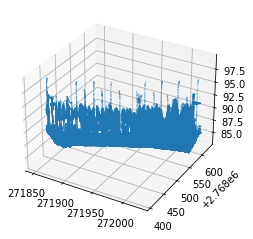

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')
ax.scatter(decimated_points_random[:,0], decimated_points_random[:,1], decimated_points_random[:,2], s=0.01)
plt.show()